In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
ubuntu1804 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu18.04.csv')
ubuntu1804.rename(columns={'total_time': 'total_time'}, inplace=True)
ubuntu1804 = ubuntu1804.groupby('test_name')['total_time'].mean()

In [8]:
ubuntu2004 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu20.04.csv')
ubuntu2004 = ubuntu2004.groupby('test_name')['total_time'].mean()
ubuntu2004.rename(index={1: "total_time_2004"})
ubuntu2004.head(5)

test_name
add0       0.000668
add1       0.000666
add3       0.000664
add4       0.000684
addmod0    0.000662
Name: total_time, dtype: float64

In [13]:
ubuntu2110 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu21.10.csv')
ubuntu2110.head(5)
ubuntu2110 = ubuntu2110.groupby('test_name')['total_time'].mean()
ubuntu2110.rename(index={1: "total_time_2110"})
ubuntu2110.head(5)

test_name
add0       0.000715
add1       0.000697
add3       0.000702
add4       0.000713
addmod0    0.000708
Name: total_time, dtype: float64

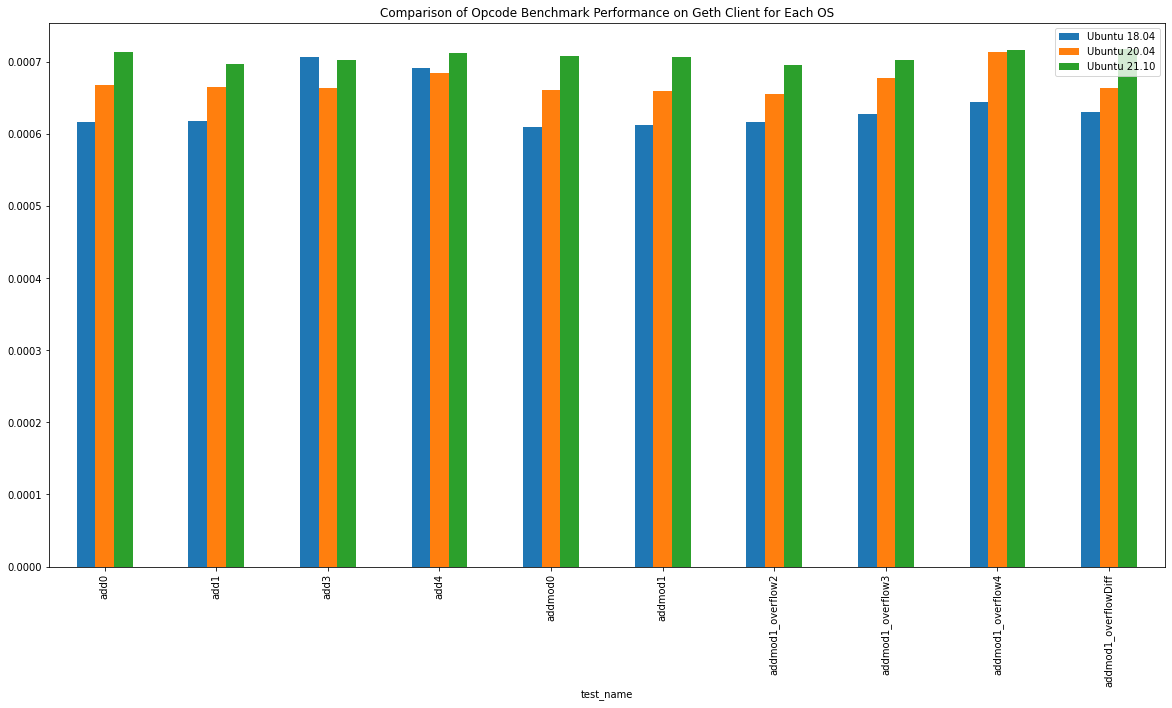

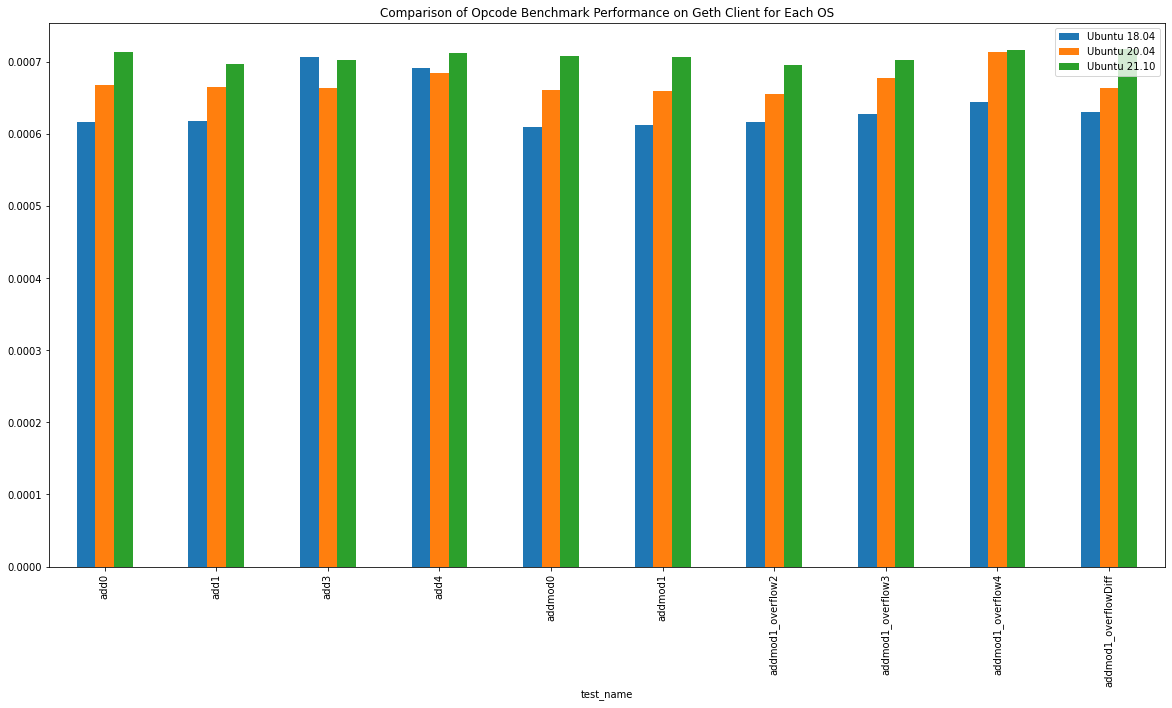

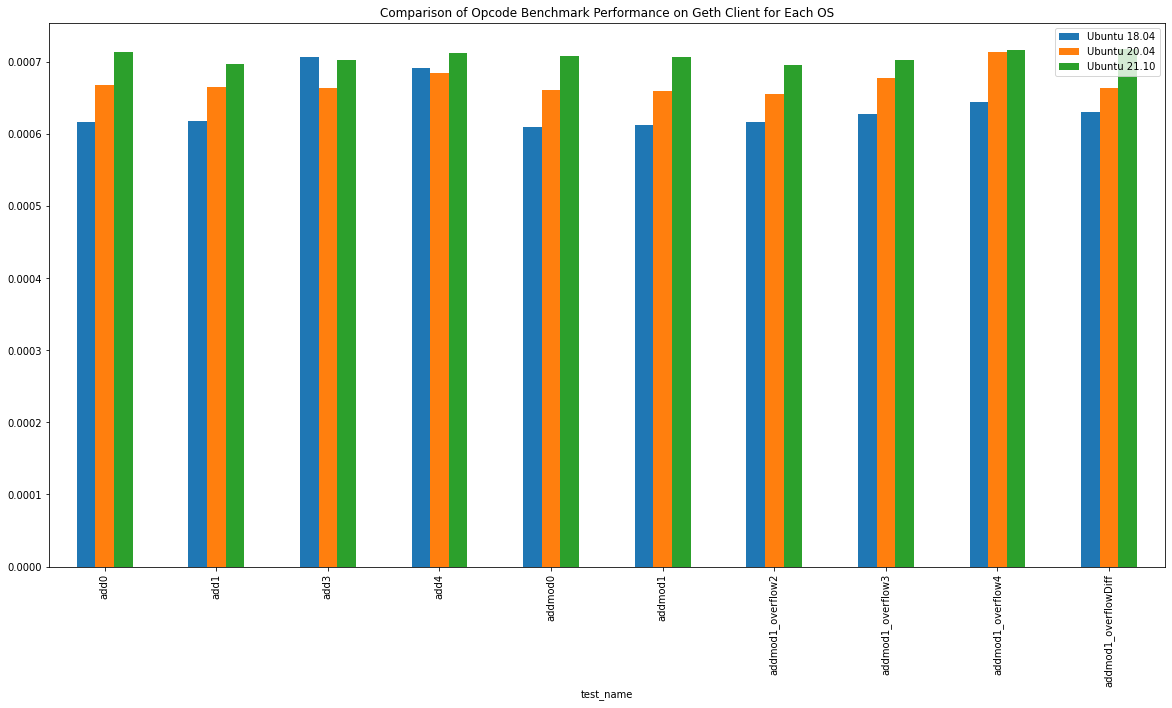

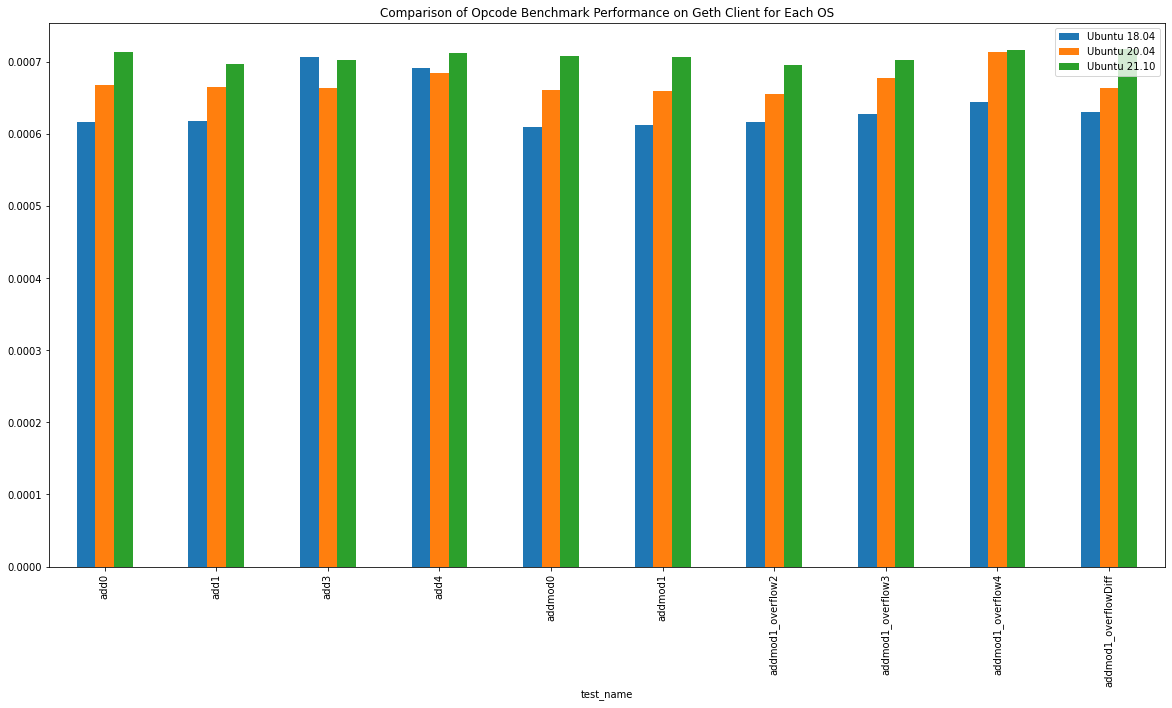

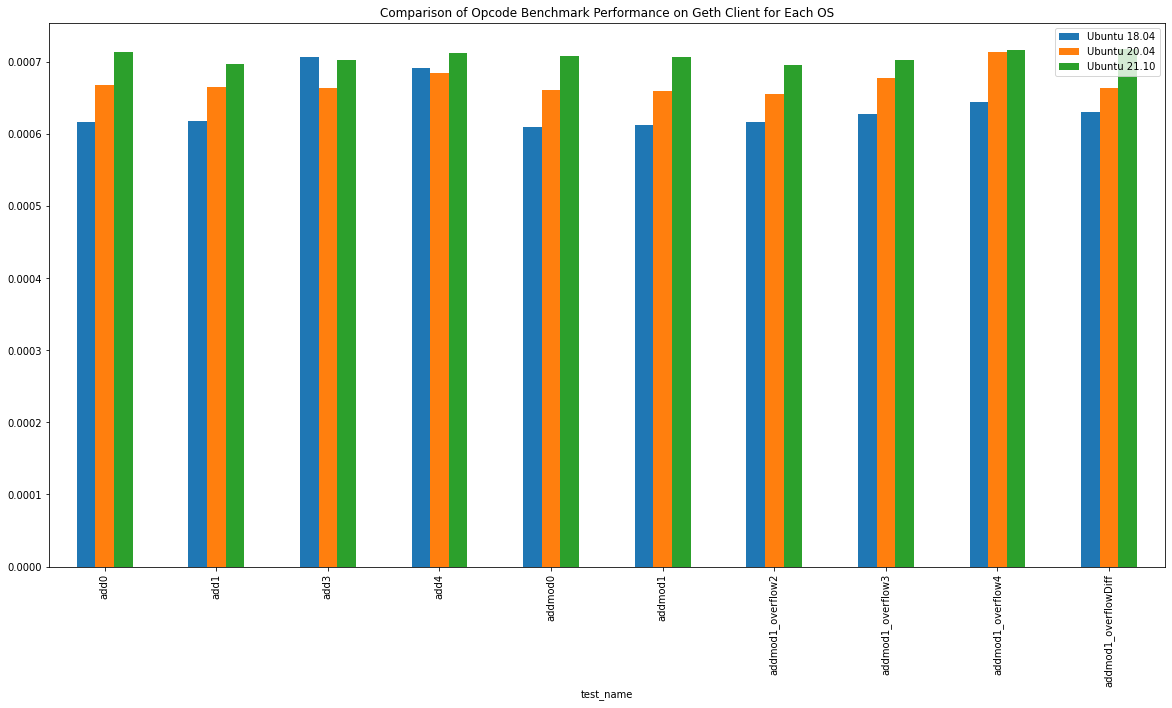

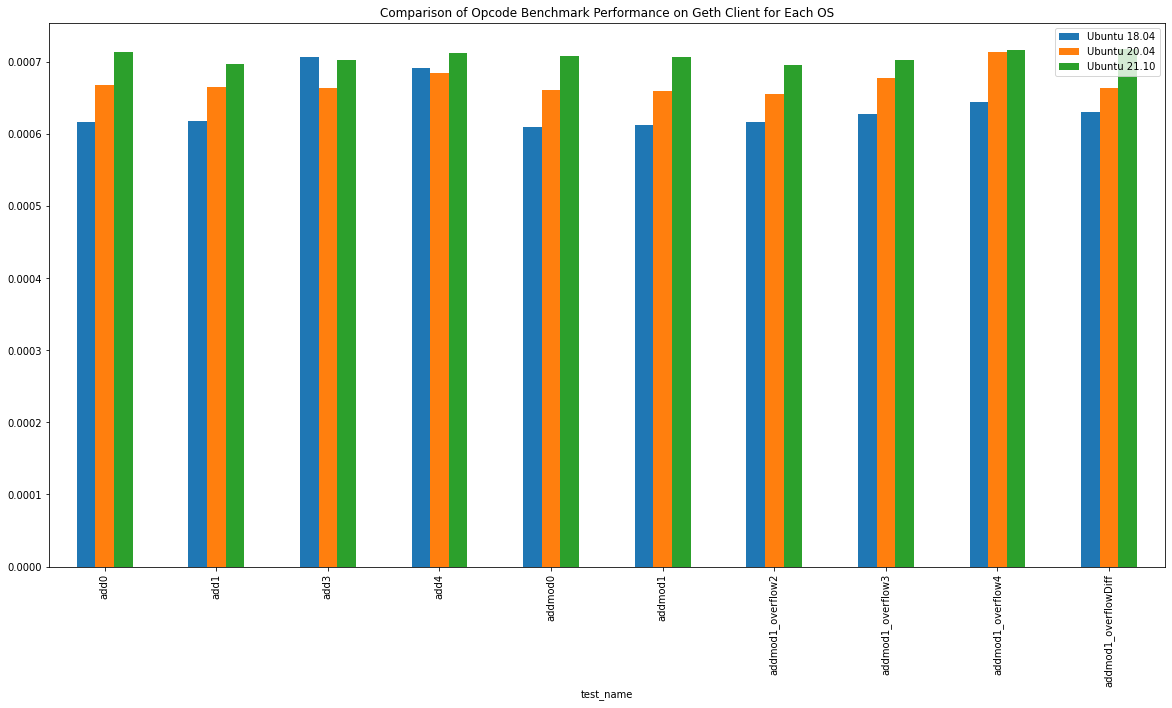

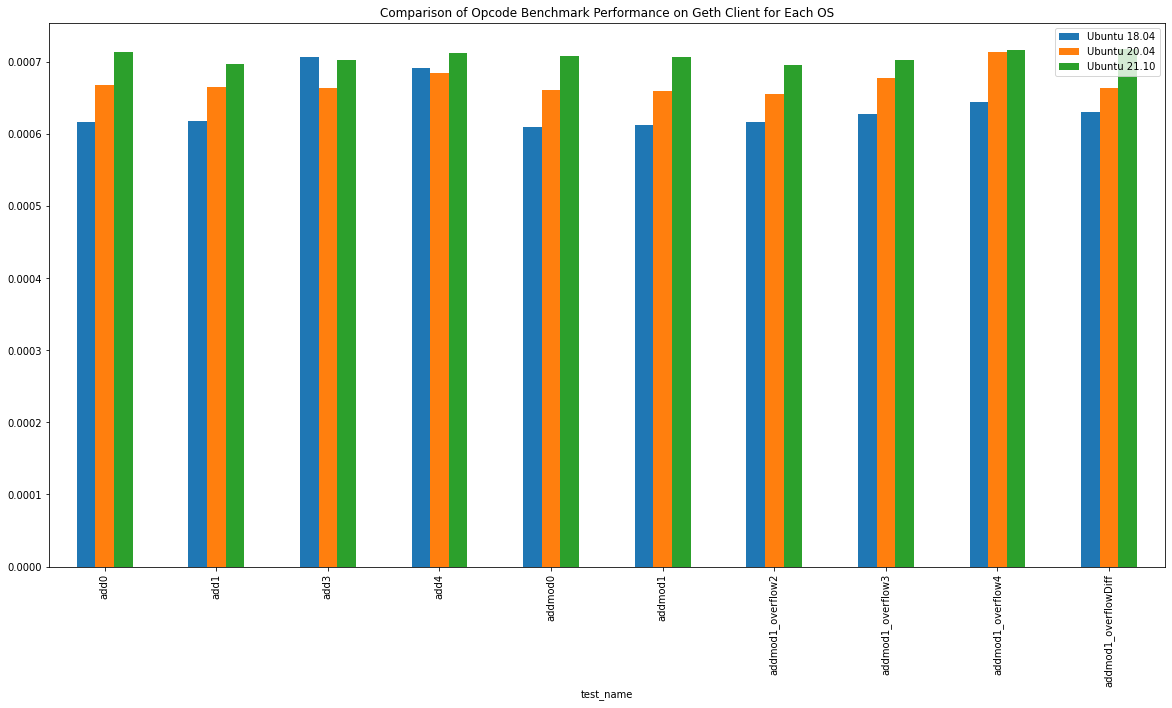

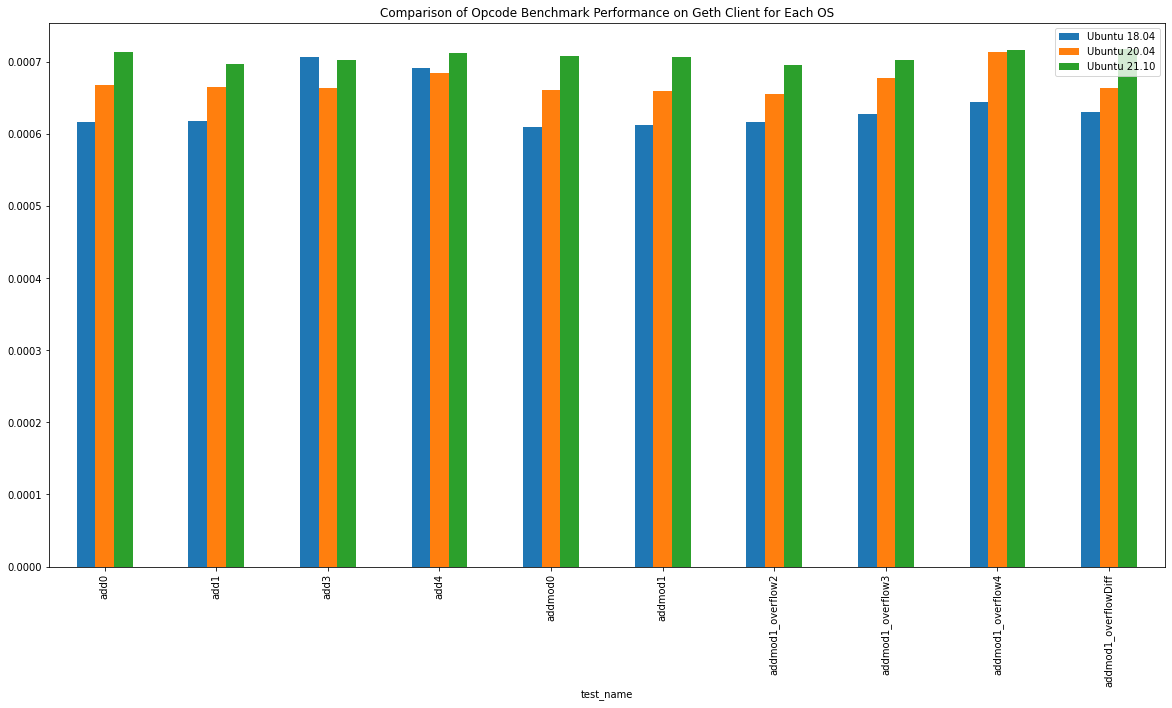

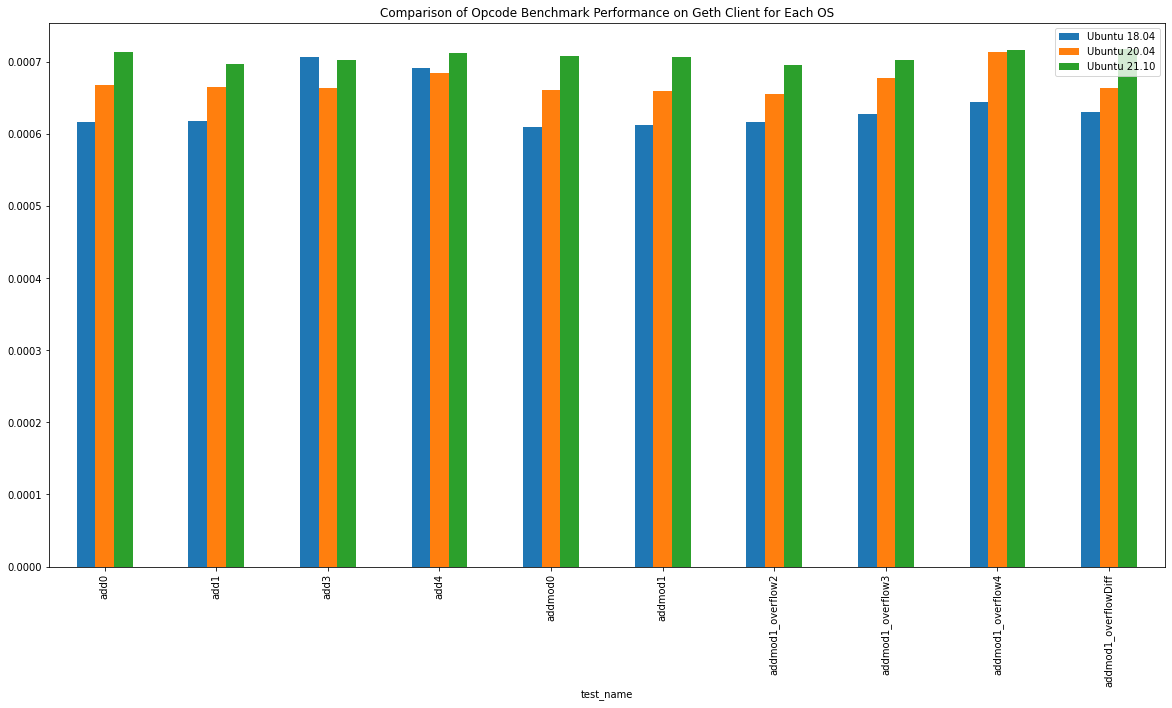

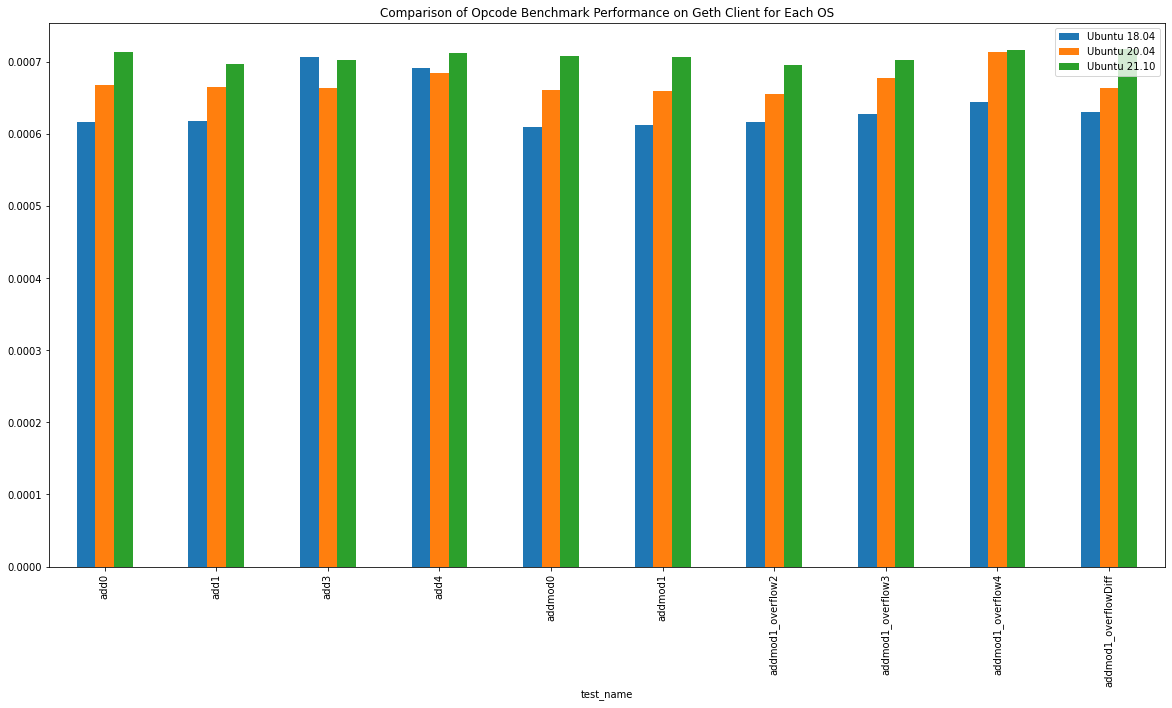

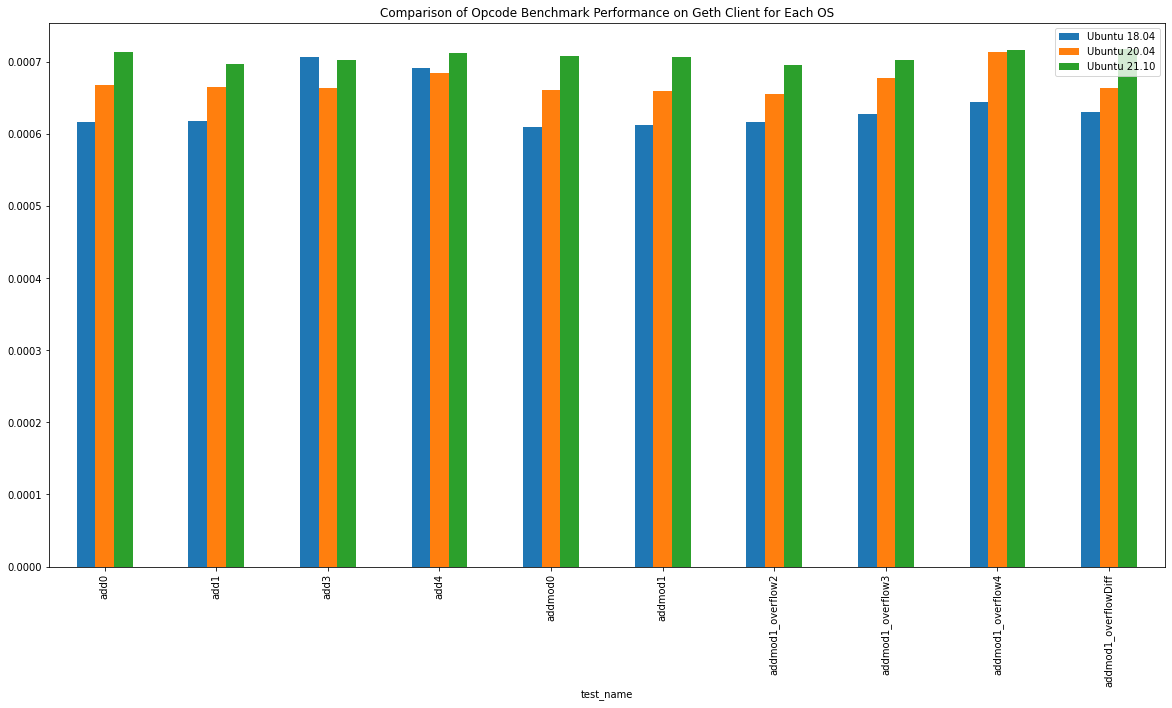

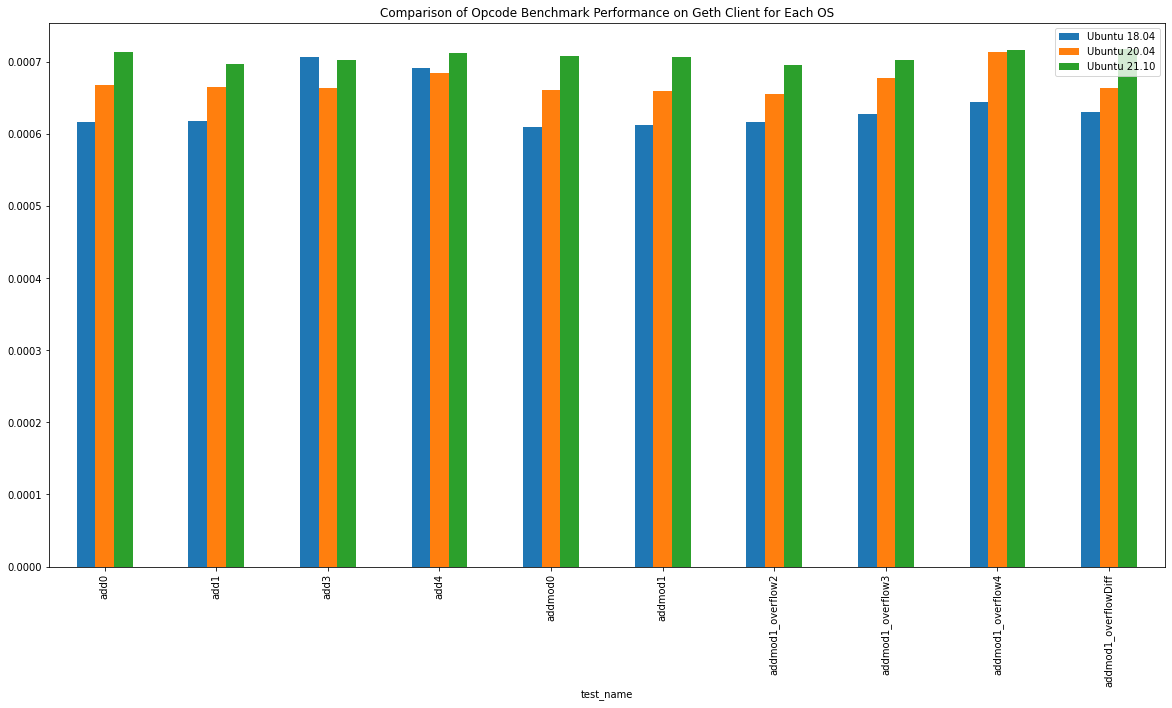

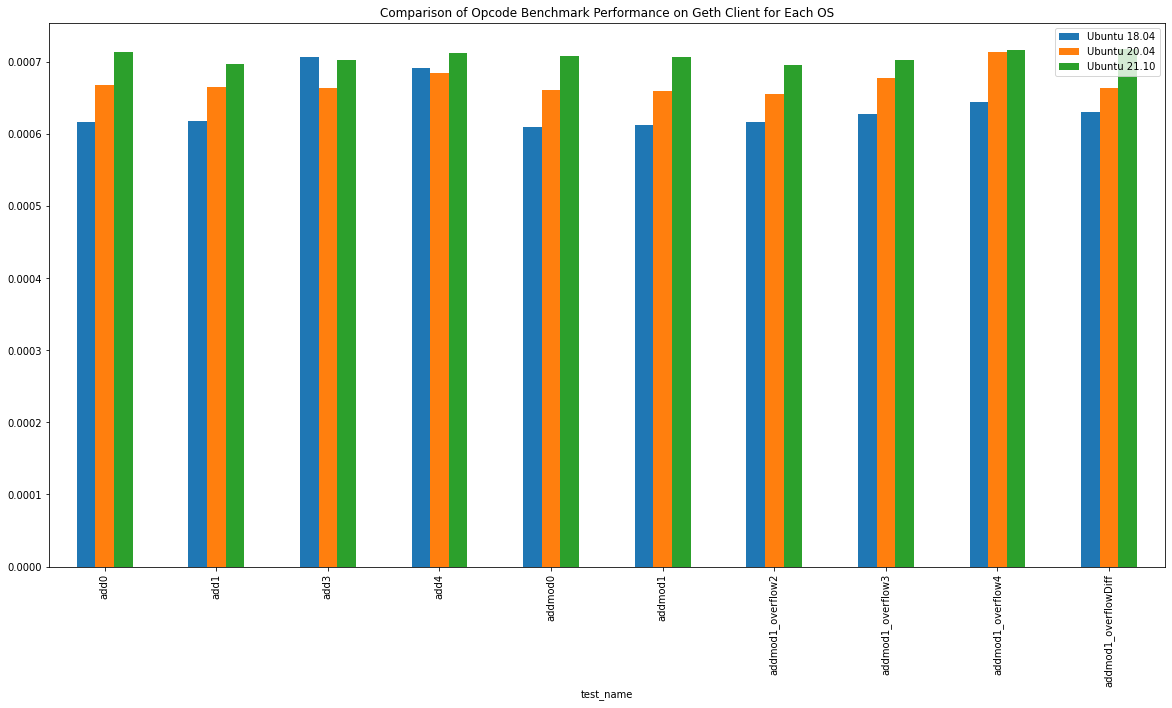

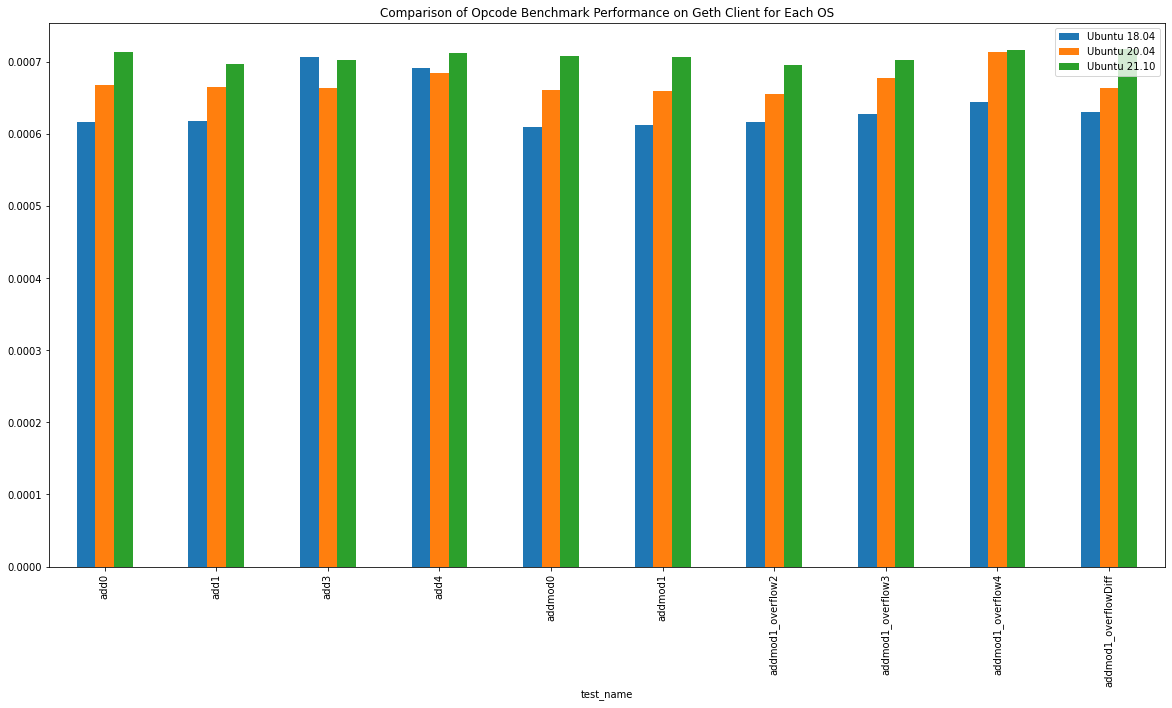

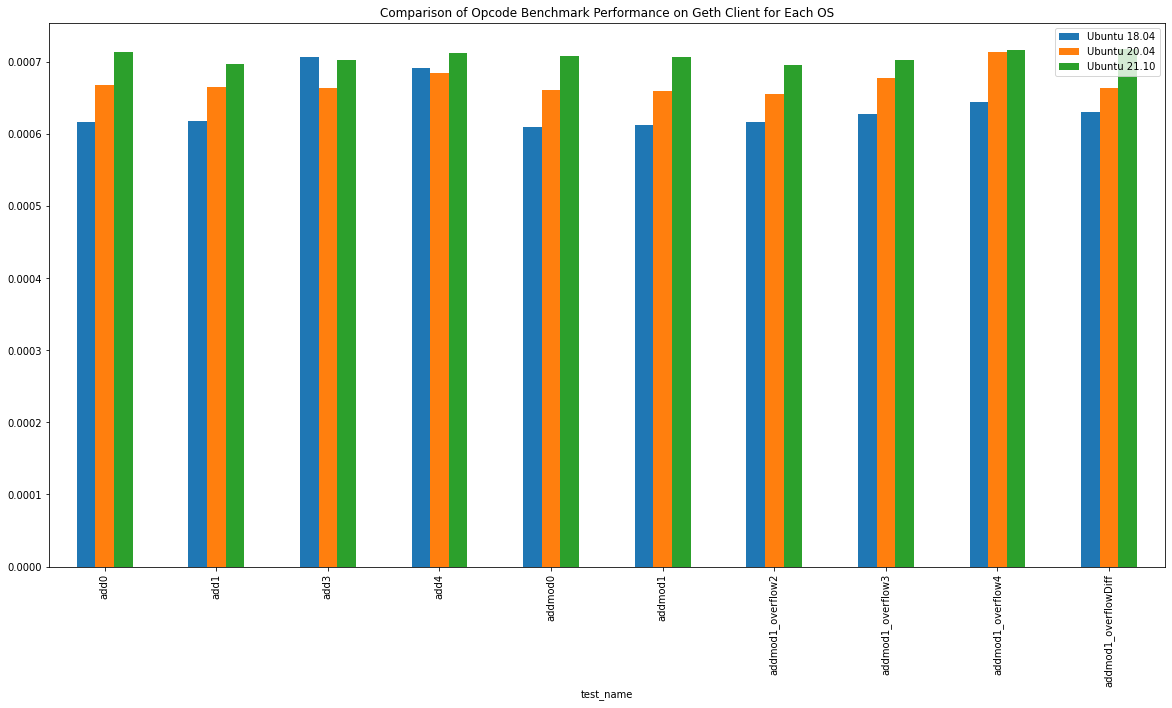

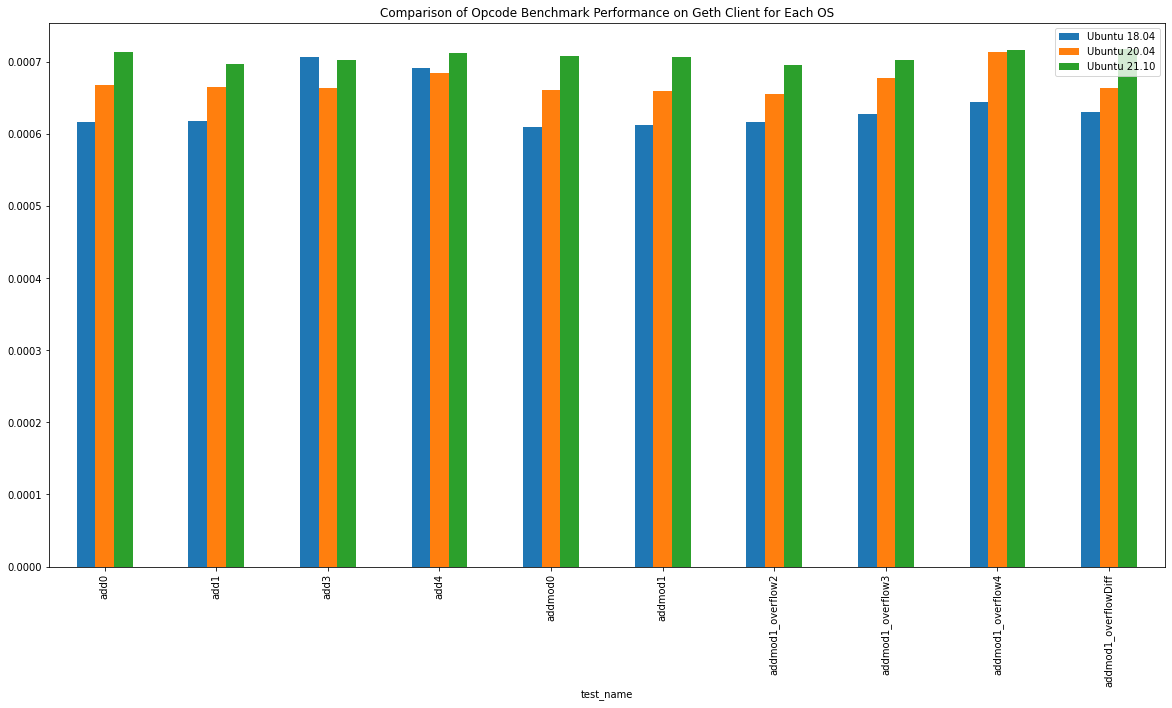

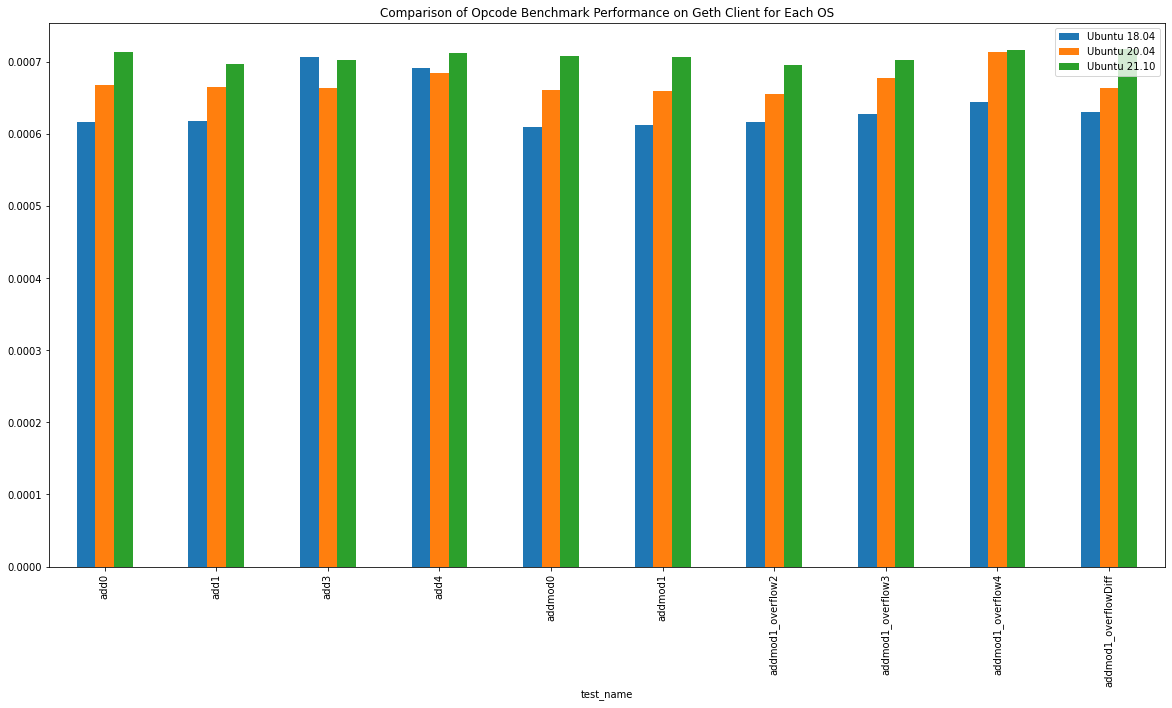

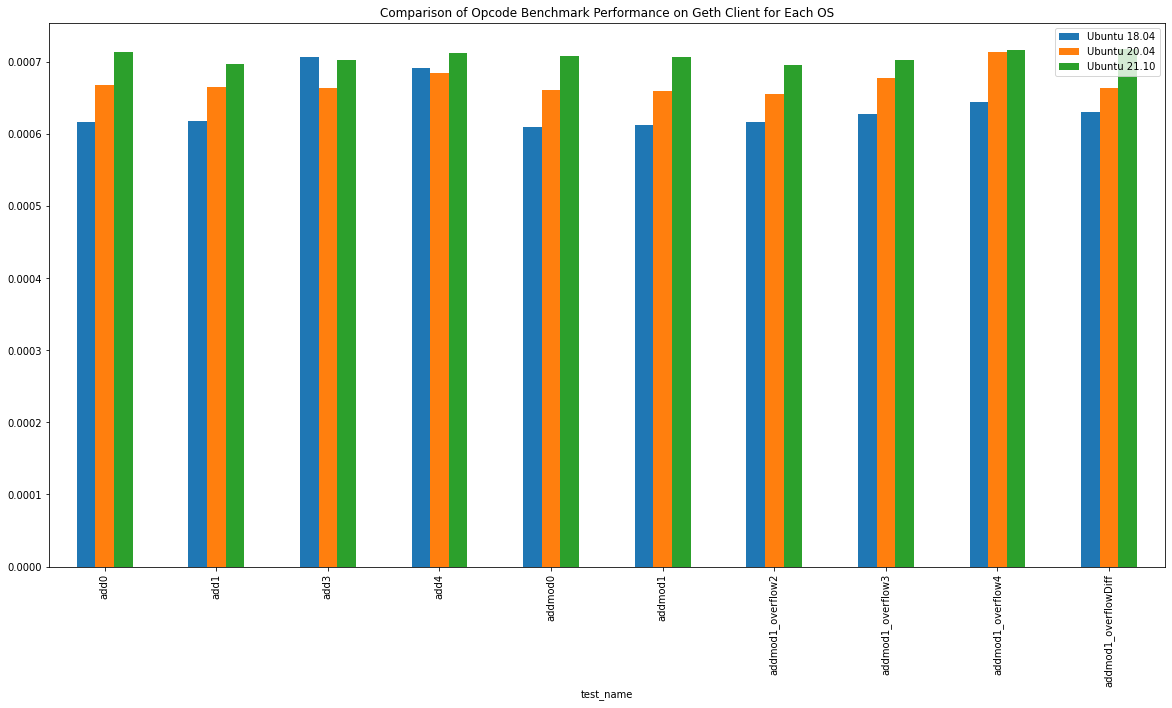

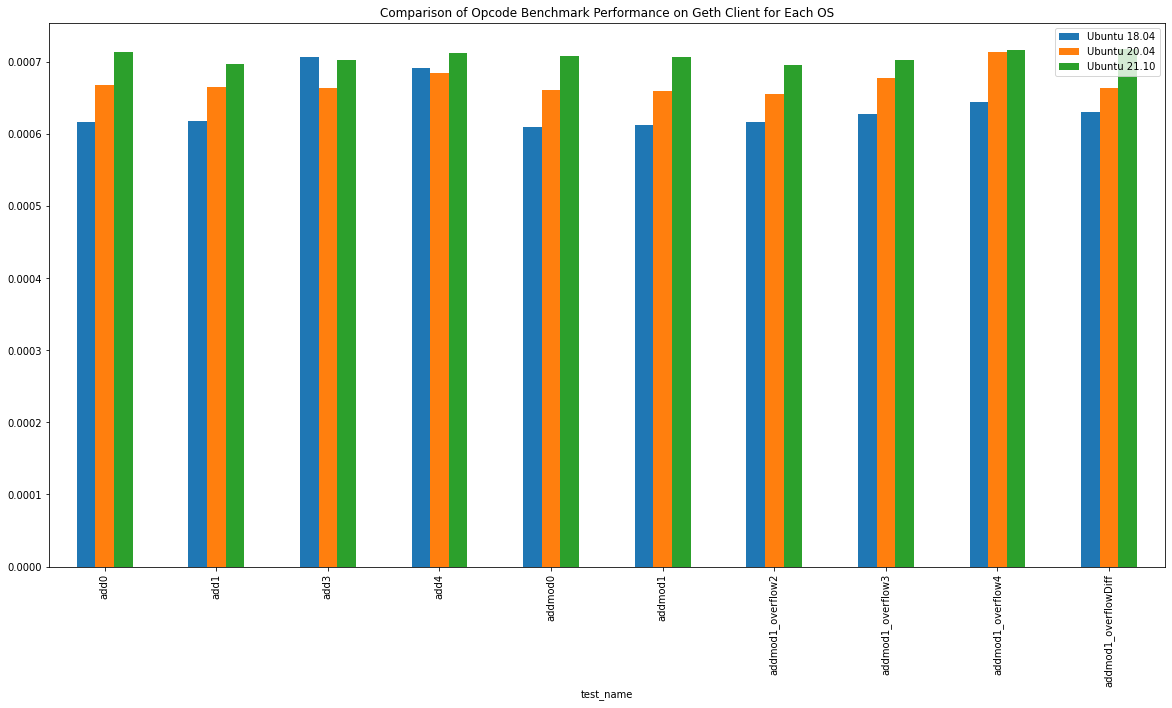

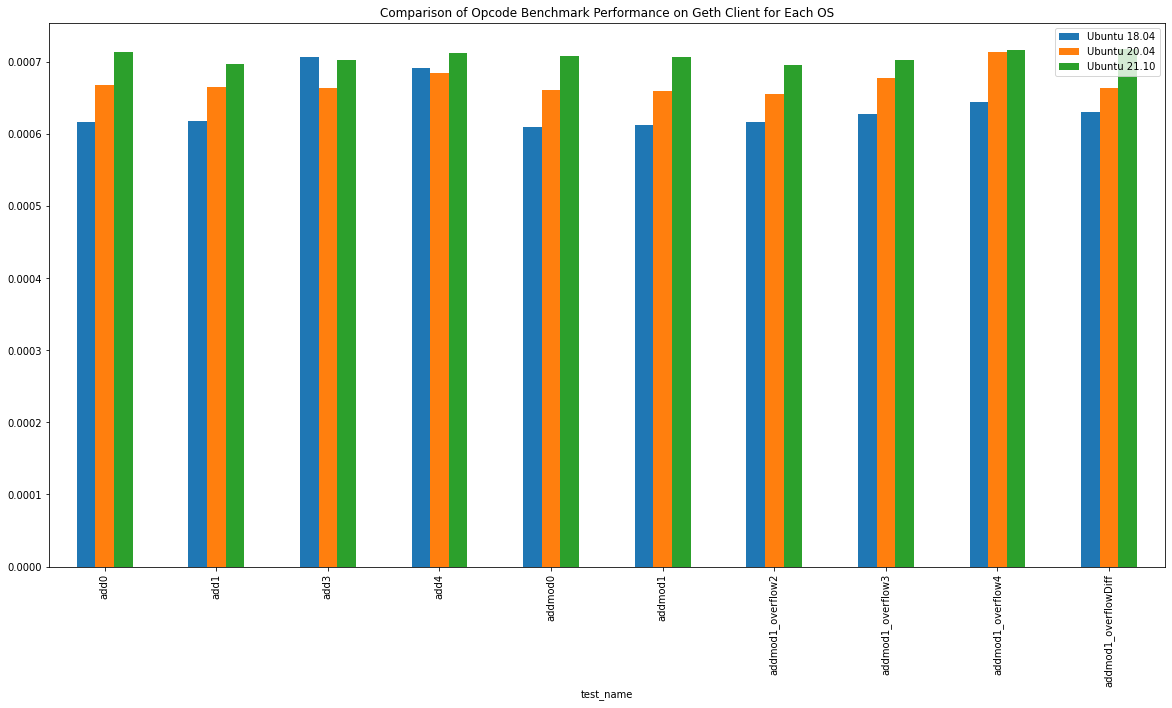

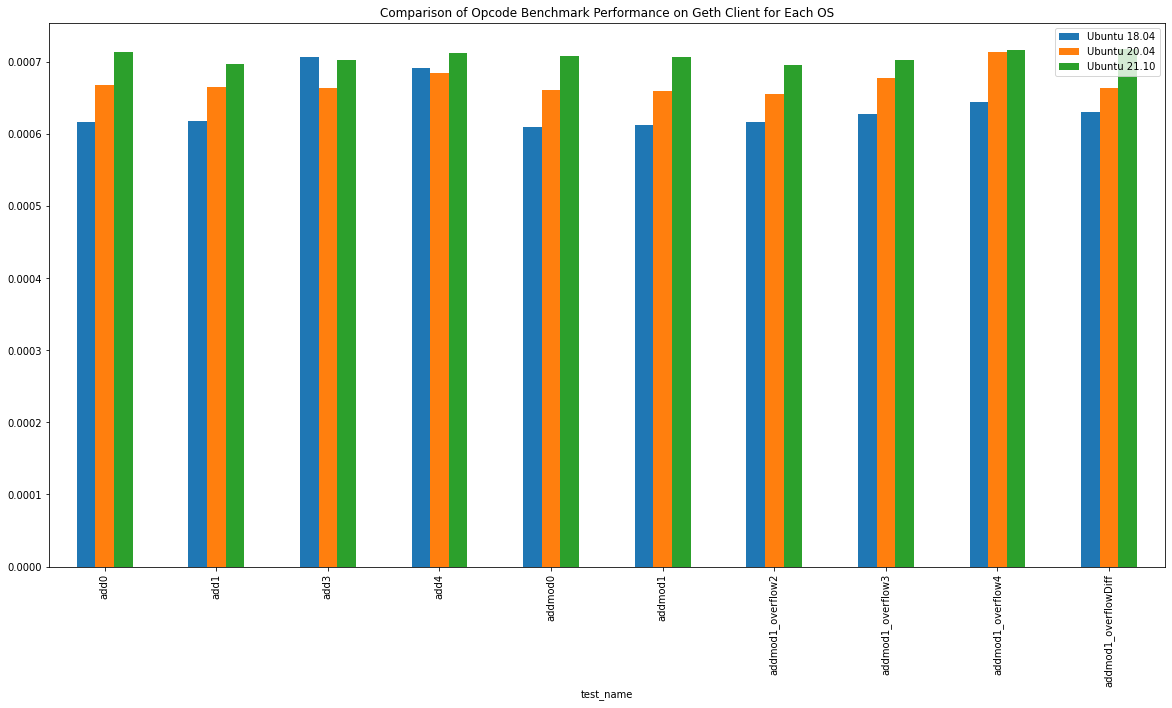

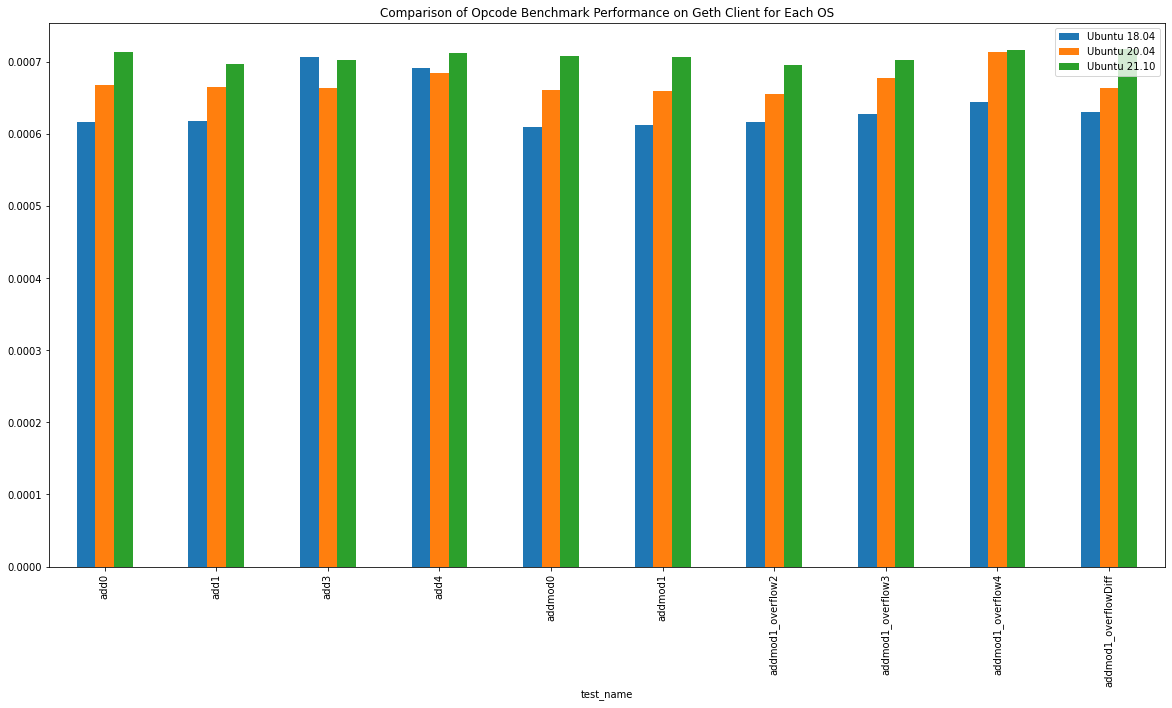

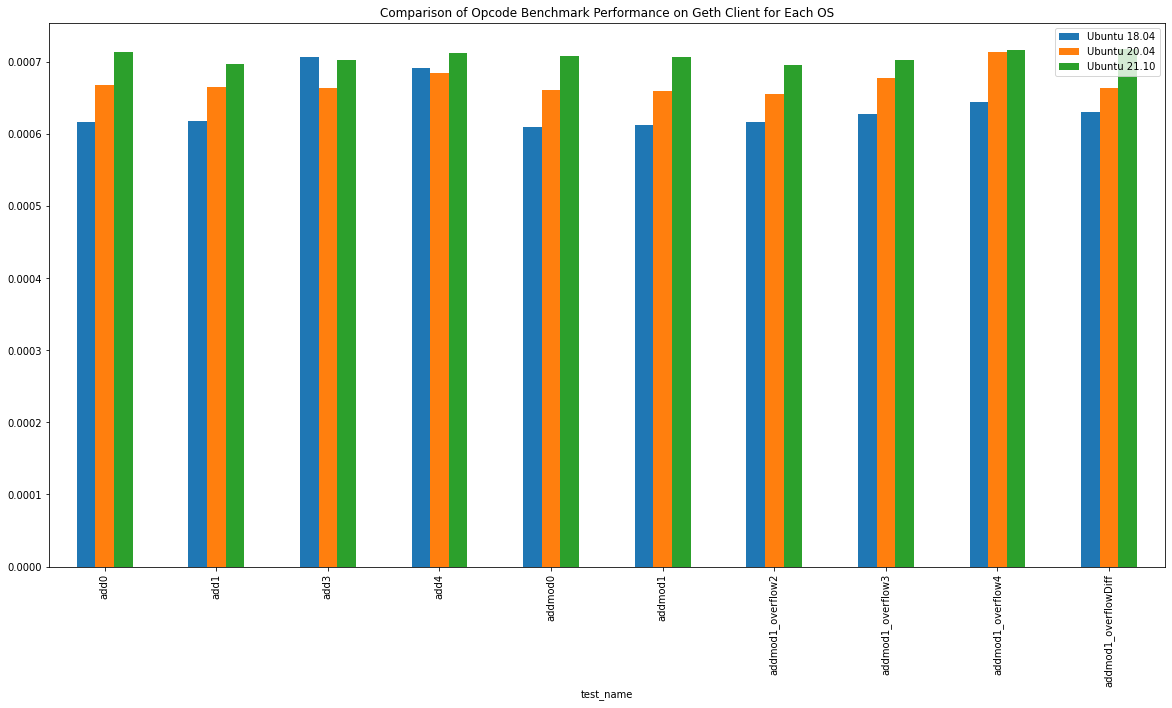

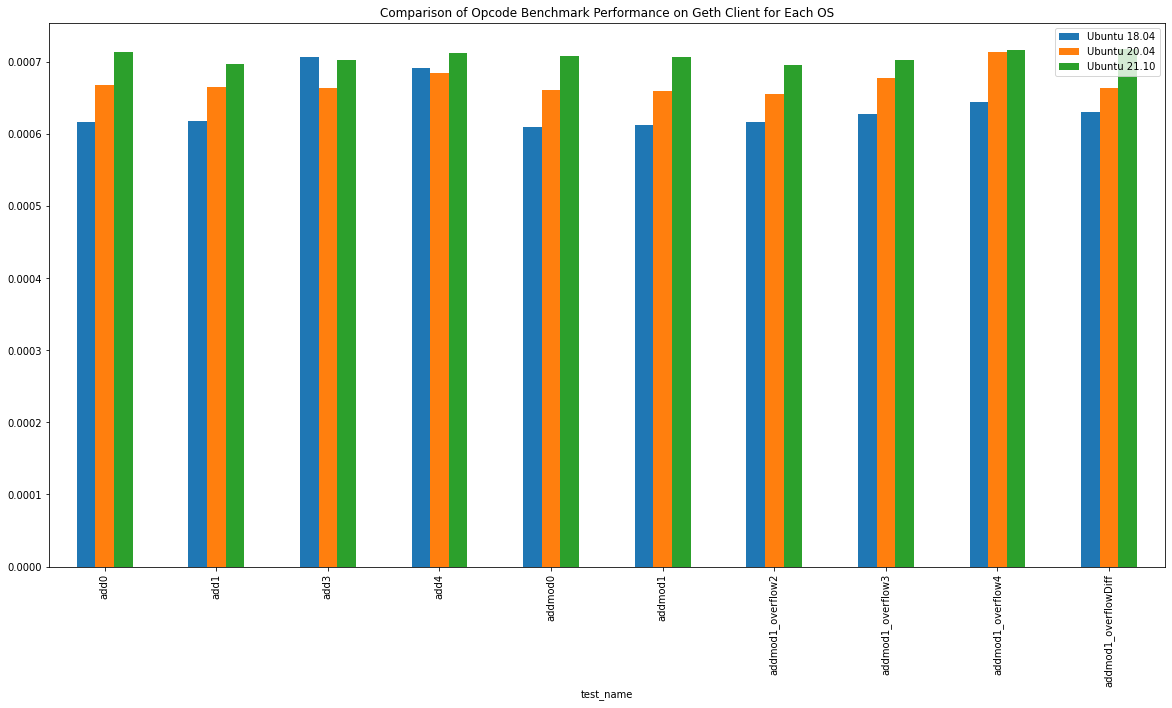

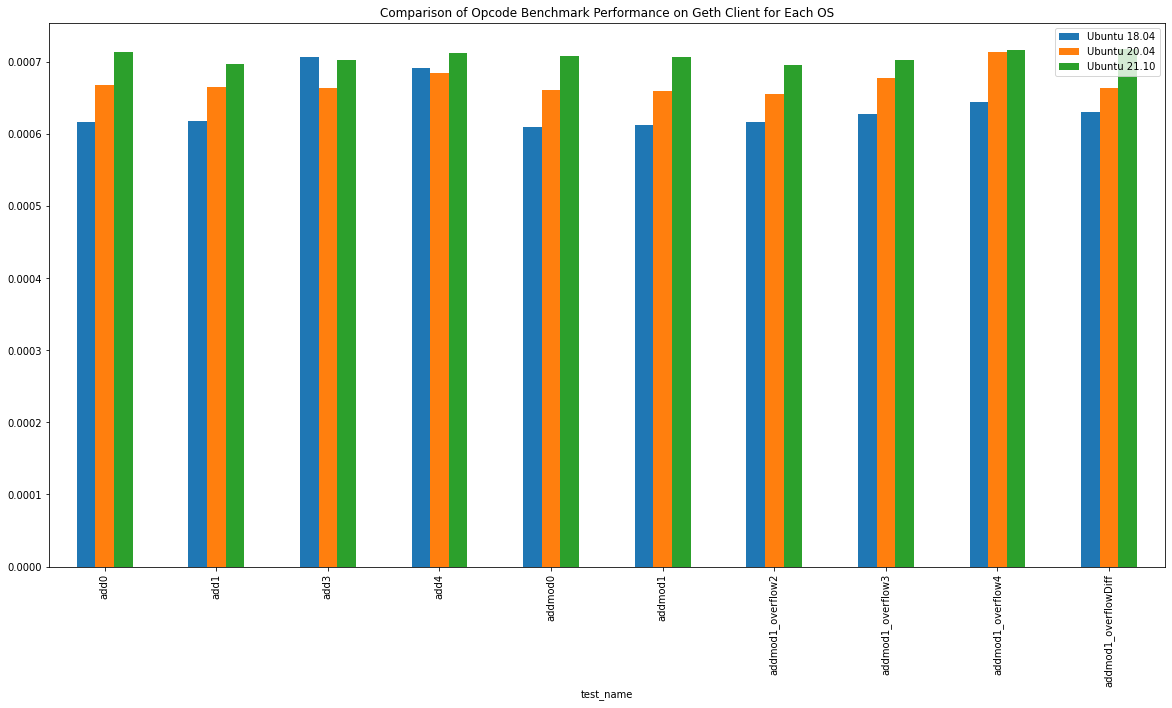

In [62]:

df = pd.merge(ubuntu1804, ubuntu2004,on='test_name')
df = pd.merge(df, ubuntu2110,on='test_name')
df = df.rename(columns={"total_time_x": "Ubuntu 18.04", "total_time_y": "Ubuntu 20.04", "total_time": "Ubuntu 21.10"}, errors="raise")
#df = df.head(4)

index = df.index
number_of_rows = len(index)

row_count = 0
while (row_count < number_of_rows):
    df_fragment = df.head(10)
    last_row = row_count
    row_count = row_count + 10
    df.drop(df.index[last_row:row_count])
    df_fragment.plot(kind="bar",  title='Comparison of Opcode Benchmark Performance on Geth Client for Each OS')
    # df.plot(x=[0], y=["Ubuntu 18.04", "Ubuntu 20.04"], kind="bar")



In [ ]:
ubuntu1804Sum = df['Ubuntu 18.04'].sum()
ubuntu2004Sum = df['Ubuntu 20.04'].sum()
ubuntu1804Sum
ubuntu2004Sum

0.22834974932669339